In [1]:
from __future__ import print_function, division
import os, bz2, json, time, tqdm
from datetime import timedelta

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import my_util

In [2]:
dataset_base = "/localdata/u6314203/dataset_engage16/tweeted_videos" 

# dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"

categories_eligible = ["autos","comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

eval_days = [90, 135, 180, 225, 270]

In [3]:
vids_set = set()
vids = []
views = []

for test_category in categories_eligible:
    with open(os.path.join(dataset_base, test_category+".json"), "r") as f:
        dataset_json = f.readlines()

    for line in dataset_json:
        record = json.loads(line)
        try:
            category_id = int(record['snippet']['categoryId'])
            day = [int(x) for x in record['insights']['days'].split(",")]
            if len(day) < eval_days[-1]: 
                continue

            view = [int(x) for x in record['insights']['dailyView'].split(",")]
        except:
            continue

        if record['id'] in vids_set:
            continue
        vids_set.add(record['id'])

        vids.append(record['id'])
        views.append(view)

print("dataset size:", len(vids))

dataset size: 1069176


In [4]:
df_total_views_log = my_util.total_log_at(eval_days, views, vids, accumulate=False)

In [5]:
plt.rcParams.update({'axes.labelsize': 20, 
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})

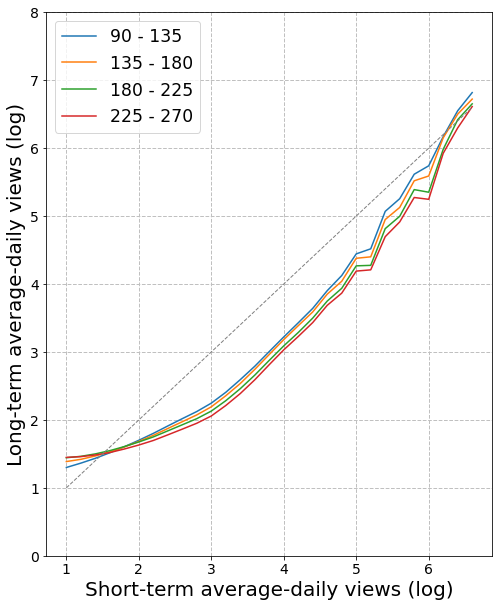

In [6]:
st = 2
fig = plt.figure(figsize=(8, 10))
res, xs, yss = my_util.plot_bin_smooth_single_axis(eval_days, df_total_views_log, fig, \
                          average_daily=True, smooth_times = st)
plt.savefig('figs/bin_smooth_single_axis/shortLong_{}.pdf'.format("all"), bbox_inches='tight')